In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import interpolate
from adjustText import adjust_text
from pybaseball import batting_stats_range
import pybaseball
import pandas as pd
from pybaseball import statcast
from pybaseball import pitching_stats
from pybaseball import batting_stats

In [3]:
df_OPS = pd.read_csv ('/Users/lloydkirwan/Documents/SeptemberOPS.csv')

print (df_OPS)

    Rk Team    W    L  OPS+▼
0    1  TOR   87   69    114
1    2  STL   90   66    114
2    3  NYY   96   59    113
3    4  LAD  107   48    113
4    5  NYM   98   58    112
5    6  HOU  102   54    110
6    7  ATL   97   59    109
7    8  PHI   83   71    107
8    9  MIN   76   79    107
9   10  MIL   83   72    106
10  11  SEA   84   70    104
11  12  SDP   86   69    104
12  13  BOS   74   81    102
13  14  TBR   85   70    102
14  15  CLE   87   68    101
15  16  WSN   54  101     99
16  17  TEX   66   88     98
17  18  CHW   76   79     98
18  19  BAL   80   75     98
19  20  SFG   77   78     98
20  21  CHC   69   86     96
21  22  ARI   72   84     95
22  23  KCR   63   92     93
23  24  LAA   69   86     93
24  25  COL   65   90     91
25  26  MIA   64   91     86
26  27  CIN   60   96     84
27  28  PIT   59   97     83
28  29  DET   62   92     83
29  30  OAK   56   99     83


In [5]:
df_ERA = pd.read_csv ('/Users/lloydkirwan/Documents/SeptemberERA.csv')

print(df_ERA)

    Rk Team  Lg  ERA+    W    L
0    1  LAD  NL   150  107   48
1    2  HOU  AL   133  102   54
2    3  ATL  NL   121   97   59
3    4  NYY  AL   118   96   59
4    5  CLE  AL   110   87   68
5    6  TBR  AL   108   85   70
6    7  NYM  NL   108   98   58
7    8  SFG  NL   106   77   78
8    9  LAA  AL   105   69   86
9   10  SEA  AL   104   84   70
10  11  PHI  NL   104   83   71
11  12  MIA  NL   103   64   91
12  13  STL  NL   102   90   66
13  14  BAL  AL   102   80   75
14  15  MIL  NL   102   83   72
15  16  CHW  AL   101   76   79
16  17  CHC  NL   100   69   86
17  18  TOR  AL    99   87   69
18  19  SDP  NL    99   86   69
19  20  MIN  AL    97   76   79
20  21  DET  AL    96   62   92
21  22  TEX  AL    96   66   88
22  23  ARI  NL    95   72   84
23  24  BOS  AL    94   74   81
24  25  CIN  NL    93   60   96
25  26  COL  NL    92   65   90
26  27  PIT  NL    89   59   97
27  28  KCR  AL    88   63   92
28  29  OAK  AL    82   56   99
29  30  WSN  NL    80   54  101


In [13]:
merged_data = df_OPS.merge(df_ERA,on=["Team"])

merged_data2 = merged_data.T.drop_duplicates().T
df_final = merged_data2.drop(['Rk_x', 'Rk_y'], axis = 1)
df_final.rename(columns={"W_x": "W", "L_x": "L", "OPS+▼": "OPS+"}, inplace=True)
print(df_final)

   Team    W    L OPS+  Lg ERA+
0   TOR   87   69  114  AL   99
1   STL   90   66  114  NL  102
2   NYY   96   59  113  AL  118
3   LAD  107   48  113  NL  150
4   NYM   98   58  112  NL  108
5   HOU  102   54  110  AL  133
6   ATL   97   59  109  NL  121
7   PHI   83   71  107  NL  104
8   MIN   76   79  107  AL   97
9   MIL   83   72  106  NL  102
10  SEA   84   70  104  AL  104
11  SDP   86   69  104  NL   99
12  BOS   74   81  102  AL   94
13  TBR   85   70  102  AL  108
14  CLE   87   68  101  AL  110
15  WSN   54  101   99  NL   80
16  TEX   66   88   98  AL   96
17  CHW   76   79   98  AL  101
18  BAL   80   75   98  AL  102
19  SFG   77   78   98  NL  106
20  CHC   69   86   96  NL  100
21  ARI   72   84   95  NL   95
22  KCR   63   92   93  AL   88
23  LAA   69   86   93  AL  105
24  COL   65   90   91  NL   92
25  MIA   64   91   86  NL  103
26  CIN   60   96   84  NL   93
27  PIT   59   97   83  NL   89
28  DET   62   92   83  AL   96
29  OAK   56   99   83  AL   82


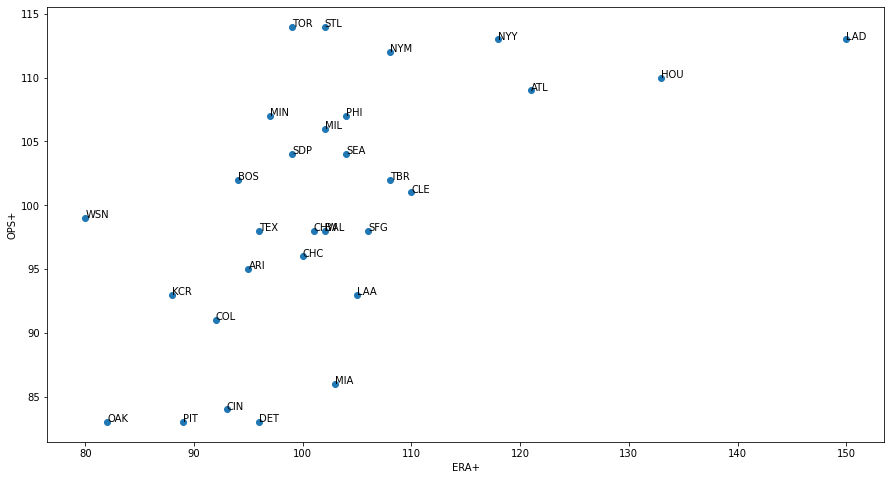

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
# plot
ax.scatter(x=df_final['ERA+'],y=df_final['OPS+'])
texts = []
    
# set labels
ax.set_xlabel('ERA+')
ax.set_ylabel('OPS+')

# annotate points in axis
for idx, row in df_final.iterrows():
    ax.annotate(row['Team'], (row['ERA+'], row['OPS+']) ) 

# force matplotlib to draw the graph
plt.show()